# Titanic Dataset

## Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
full_dataset = pd.read_csv("datasets/titanic/train.csv")
full_dataset.shape

(891, 12)

In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(full_dataset, test_size=0.2)

# Creating a copy for exploration

titanic_exp = train_set.copy()
titanic_exp.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.50,NaN,S
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.05,NaN,S
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.00,NaN,S


In [5]:
titanic_exp.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.00,712.00,712.00,563.00,712.00,712.00,712.00
mean,439.50,0.36,2.32,29.61,0.51,0.39,32.94
std,258.11,0.48,0.84,14.63,1.06,0.81,52.33
min,1.00,0.00,1.00,0.67,0.00,0.00,0.00
25%,216.75,0.00,2.00,20.00,0.00,0.00,7.90
50%,435.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,658.25,1.00,3.00,38.00,1.00,0.00,31.28
max,891.00,1.00,3.00,80.00,8.00,5.00,512.33


In [6]:
titanic_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 570 to 8
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          563 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [7]:
titanic_exp.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            149
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         1
dtype: int64

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

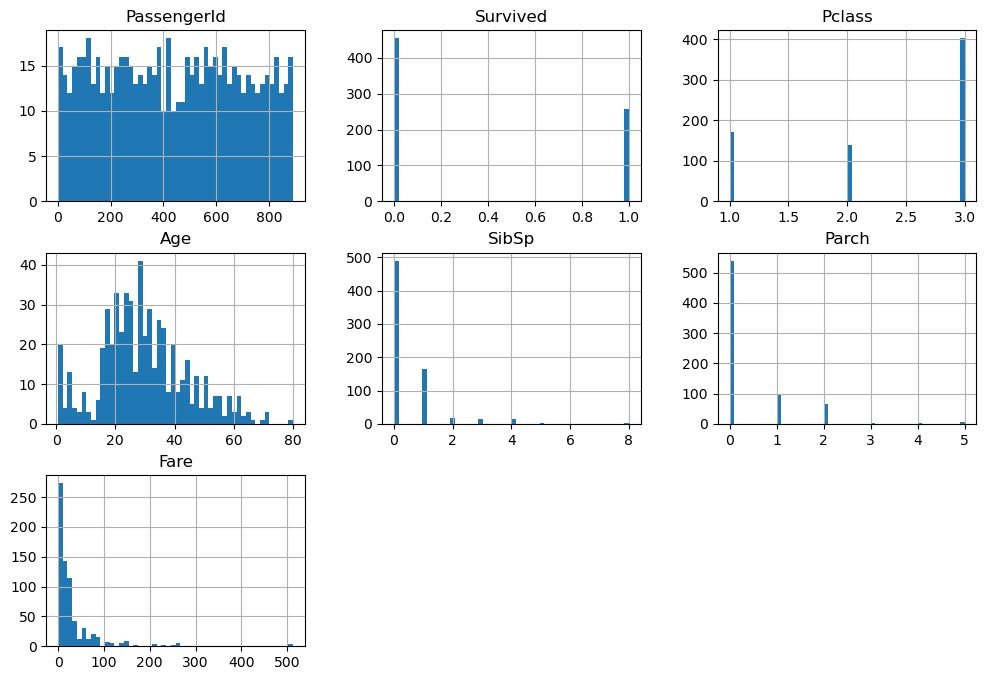

In [8]:
titanic_exp.hist(bins=50, figsize=(12, 8))

In [9]:
corr_matrix = titanic_exp.corr()
corr_matrix["Survived"]

PassengerId   -0.005072
Survived       1.000000
Pclass        -0.323867
Age           -0.085869
SibSp         -0.022589
Parch          0.092830
Fare           0.268519
Name: Survived, dtype: float64

## Cleaning the Data

In [10]:
train_dataset = train_set.copy()

In [11]:
train_dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.50,NaN,S
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.05,NaN,S


In [12]:
red_train_dataset = train_dataset.drop(["Name", "PassengerId", "Ticket", "Cabin"], axis=1)
red_train_dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
570,1,2,male,62.0,0,0,10.50,S
112,0,3,male,22.0,0,0,8.05,S


### Missing Data

In [13]:
red_train_dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         149
SibSp         0
Parch         0
Fare          0
Embarked      1
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

num_set = red_train_dataset[["Survived", "Age", "Fare"]]
imputer.fit(num_set)

X = imputer.transform(num_set)
titanic_num_data = pd.DataFrame(X, columns=num_set.columns, index=num_set.index)
titanic_num_data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [15]:
# Estas dos las voy a tratar como numericos pero utilizando la strategy del más común en vez de la mediana

red_train_dataset["Parch"].value_counts()
red_train_dataset["SibSp"].value_counts()

imputer = SimpleImputer(strategy="most_frequent")

num_set = red_train_dataset[["Parch", "SibSp"]]
imputer.fit(num_set)

X = imputer.transform(num_set)
titanic_num_freq = pd.DataFrame(X, columns=num_set.columns, index=num_set.index)
titanic_num_freq.isnull().sum()

Parch    0
SibSp    0
dtype: int64

In [16]:
# OneHotEncoding para categógicos

from sklearn.preprocessing import OneHotEncoder

titanic_cat = red_train_dataset[["Pclass", "Sex", "Embarked"]]

onehotencoder = OneHotEncoder(sparse_output=False)
titanic_1hot = onehotencoder.fit_transform(titanic_cat)

titanic_1hot_df = pd.DataFrame(titanic_1hot, columns=onehotencoder.get_feature_names_out(), index=titanic_cat.index)
titanic_1hot_df.head(2)

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
570,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
112,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## Let's see if we can transform some variables to make them more "normal" distributed

In [17]:
# No parece que vaya bien, aplicar el log a la variable Fare, aparte del problema de los infinitos

## Transformation Pipelines

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a custom transformer to delete unnecesary columns

class ColDropper(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = X.drop(["Name", "PassengerId", "Ticket", "Cabin"], axis=1)
        return X_copy 

        

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer

test_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

train_copy = train_set.copy()

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())

col_transformer = make_column_transformer()


## Logistic Regression